# Ride Sharing Analysis

# Table of Contents

- [Zuber](#scrollTo=lXjgy1kvf7p_)

    - [Initialization](#scrollTo=yMunTP8Lf7qL)

    - [Data Preprocessing](#scrollTo=fKvhgbPYf7qQ)

        - [2.1. Company Data](#scrollTo=0X7kBKvsf7qR)

        - [2.2. Location Data](#scrollTo=ZyR2zvoff7qa)

    - [Data Visualization](#scrollTo=C6zufgZKf7qj)

        - [3.1. Top 10 Company](#scrollTo=dgvW3eeOf7qj)

        - [3.2. Top 10 Destination](#scrollTo=IyyzX7PGf7qm)

    - [Uji Hipotesis](#scrollTo=73cOIszxf7qr)

        - [4.1. Enrich Data](#scrollTo=01g_5zFaf7qr)

        - [4.2. Test Hypothesis](#scrollTo=ZNLpwdSKf7q0)

- [Consclusion](#scrollTo=1NTc7eIMf7q9)



# Zuber

Kami bekerja sebagai analis untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugas Kami adalah untuk menemukan pola pada informasi yang tersedia. Kami ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.
Dengan menggunakan basis data, Kami akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

**Goals:**
- Mengidentifikasi top 10 wilayah yang menjadi tujuan pengantaran
- Menampilkan diagram perusahaan yang memiliki jumlah pengantaran 
- Menampilkan grafik 10 wilayah teratas yang menjadi destinasi penumpang  

**Uji Hipotesis:**
- Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan 

## 1. Initialization

In [1]:
# load all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## 2. Data Preprocessing

In [2]:
# load all datas

df_company = pd.read_csv('/content/project_sql_result_01.csv')
df_trips = pd.read_csv('/content/project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('/content/project_sql_result_07.csv')

### 2.1. Company Data

**Deskripsi Data**
- `company_name`: nama perusahaan taksi
- `trips_amount`: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

In [3]:
# menampilkan sample data company
df_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [4]:
# menampilkan nilai unique
df_company['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S.Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih company',
       '2192 - 73487 Zeymane Corp',
       '2241 - 44667 - Felman Corp, Manuel Alonso', '24 Seven Taxi',
       '2733 - 74600 Benny Jona', '2809 - 95474 C & D Cab Co Inc.',
       '2823 - 73307 Lee Express Inc', '3011 - 66308 JBL Cab Inc.',
       '303 Taxi', '3556 - 36214 RC Andrews Cab',
       '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises',
       '3721 - Santamaria Express, Alvaro Santamaria',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha ride inc', '6743 - 78771 Luhak Corp'

In [5]:
# menampilkan informasi dataset company
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# menampilkan statisktik deskriptif data
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Dataset terdiri dari **2** kolom dan **64** baris, tidak terdapat *missing value* pada data, type data juga sudah sesuai dimana kolom `company_name` didefinisikan sebagai **object** dan kolom `trips_amount` didefinisikan sebagai **int64**.

Tabel deskripsi juga menunjukkan bahwa suatu perusahaan dengan jumlah perjalanan tertinggi memiliki angka **19558** dan perusahaan dengan jumlah terendah memiliki angka perjalanan **2**, dengan rata-rata **2145** pada tanggal 15-16 November 2017, artinya ada perusahaan yang hanya memiliki 1 kali perjalanan dalam satu hari menunjukkan adanya perbedaan yang sangat signifikan antara satu perusahaan dan perusahaan lainnya.

Tetapi kita melihat ada beberapa **register** dimulai dengan angka maka kita akan mempelajarinya lebih lanjut apakah memengaruh.

### 2.2. Location Data

**Deskripsi Data:**
- `dropoff_location_name`: nama wilayah di Chicago tempat perjalanan berakhir
- `average_trips`: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

In [7]:
# menampilkan sample dataset location 
df_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [8]:
# menampilkan nilai unique
df_trips['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

In [9]:
# menampilkan informasi dataset location 
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Kolom `average_trips` didefinisikan sebagai **float**, maka kita akan mengubahnya karena seharusnya typenya adalah **integer**, karena menunjukkan rata-rata perjalanan. 

In [10]:
# convert average_trips column
df_trips['average_trips'] = df_trips['average_trips'].apply(np.int64)
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# menampilkan datanya lagi setelah dilakukan pembersihan
df_trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


In [12]:
# menampilkan statistik deskriptif data
df_trips.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


Dataset diatas terdiri dari **2** kolom dan **94** baris, tidak terdapat *missing value* pada data diatas, tipe data seharusnya sudah benar, kolom `dropoff_location_name` didefinisikan sebagai **object** dan kolom `average_trips` didefinisikan sebagai **int**.  

Perjalanan tertinggi terjadi pada wilayah dengan jumlah **10727** pada bulan November 2017 dan perjalanan dengan jumlah **1** menjadi wilayah yang paling sedikit menjadi tujuan pada bulan November 2017. Dengan rata-rata **599** perjalanan ke setiap wilayah pada bulan tersebut.

## 3. Data Visualization

### 3.1. Top 10 Company

In [13]:
# Menampilkan 10 perusahaan dengan jumlah traffic terbanyak
top_company = df_company.sort_values(by='trips_amount', ascending=False).head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


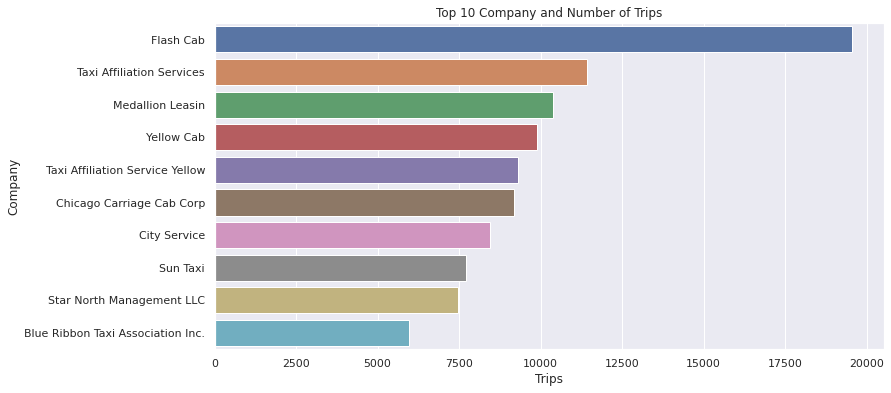

In [14]:
# menampilkan grafik
sns.set()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_company, x='trips_amount', y='company_name')
ax.set_xlabel('Trips')
ax.set_ylabel('Company')
ax.set_title('Top 10 Company and Number of Trips')
plt.show()

Dari diagram diatas kita mengetahui bahwa **Flash Cab** menjadi perusahaan dengan jumlah perjalanan terbanyak pada 15-16 November 2017. Dengan jumlah **19558** atau mendekati angka 20000, dengan jumlah ini **Flash Cab** secara signifikan mengungguli perusahaan lainnya dengan margin sekitar **42%** dari perusahaan **Taxi Affiliation Service** yang menempati posisi kedua.

### 3.2. Top 10 Destination

In [15]:
# Menampilkan 10 destinasi dengan jumlah tertinggi
top_trips = df_trips.sort_values(by='average_trips', ascending=False).head(10)
top_trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


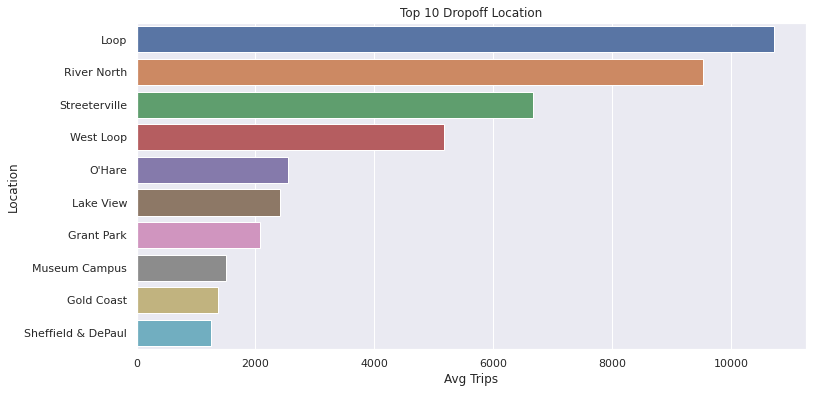

In [16]:
# menampilkan grafik
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_trips, x='average_trips', y='dropoff_location_name')
ax.set_xlabel('Avg Trips')
ax.set_ylabel('Location')
ax.set_title('Top 10 Dropoff Location')
plt.show()

Dari grafik diatas kita dapat mengambil kesimpulan bahwa **Loop** menjadi tujuan pengantaran paling tinggi di bulan November 2017.

## 4. Uji Hipotesis

### 4.1. Enrich Data

In [17]:
# menampilkan sample dataset duration
df_loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [18]:
# Menampilkan informasi data
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [19]:
# menampilkan statistik deskriptif data
df_loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Data diatas memiliki jumlah **3** kolom dan **1068** baris, kolom `start_ts` yang berisi waktu perjalanan tidak didefinisikan sebagai **timestamp** melainkan **float** maka kita akan mengubahnya terlebih dahulu. Untuk memudahkan kita akan menambah kolom menit. 

Waktu terlama suatu perjalan ditempuh dalam waktu **124** menit atat lebih dari 2 jam, waktu tersingkat adalah **0** detik yang mungkin terjadi karena perjalanan dibatalkan, dengan rata-rata waktu tempuh **34** menit setiap perjalanan atau kurang lebih setengan jam. 

In [20]:
# Mengubah type kolom start_ts
df_loop_ohare['start_ts'] =  pd.to_datetime(df_loop_ohare['start_ts'], infer_datetime_format=True)
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [21]:
# Menambahkan kolom menit
df_loop_ohare['duration_minutes'] = np.round(df_loop_ohare['duration_seconds'] / 60)
df_loop_ohare

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.0
1,2017-11-25 14:00:00,Good,1920.0,32.0
2,2017-11-25 12:00:00,Good,1543.0,26.0
3,2017-11-04 10:00:00,Good,2512.0,42.0
4,2017-11-11 07:00:00,Good,1440.0,24.0
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,0.0
1064,2017-11-11 10:00:00,Good,1318.0,22.0
1065,2017-11-11 13:00:00,Good,2100.0,35.0
1066,2017-11-11 08:00:00,Good,1380.0,23.0


Kita akan mengelompokkan data menjadi dua kondisi yaitu `good` dan `bad`.

In [22]:
# Memeriksa distribusi good dan bad weather
df_loop_ohare.groupby('weather_conditions').agg(amount=('start_ts','count'), avg_sec=('duration_seconds', 'mean'),
                                             avg_min=('duration_minutes','mean'), total_min=('duration_minutes',
                                            'sum')).reset_index()

,weather_conditions,amount,avg_sec,avg_min,total_min
0,Bad,180,2427.205556,40.450000,7281.0
1,Good,888,1999.675676,33.332207,29599.0


Dari tabel diatas kita mendapatkan *overview* bahwa terdapat perbedaan jumlah yang signifikan antara  kondisi **bad** dan **good** pada cuaca saat perjalanan berlangsung. Terdapat **180** jumlah pengantaran pada saat kondisi **bad** dan **888** pengantaran pada kondisi **good**. 

Selanjutnya kita akan memeriksa dan mengatasi apabila terdapat **outliers** dalam data kemudian kita akan membagi menjadi dua dataset berdasarkan kondisi untuk pengujian hipotesis.

In [23]:
# memeriksa dan mengatasi outliers
Q1 = df_loop_ohare['duration_seconds'].quantile(0.25)
Q3 = df_loop_ohare['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR                  

df_loop_ohare = df_loop_ohare[ ~((df_loop_ohare['duration_seconds'] < lower_bound) | (df_loop_ohare['duration_seconds'] > upper_bound)) ]

In [24]:
# Memeriksa distribusi good dan bad weather
df_loop_ohare.groupby('weather_conditions').agg(amount=('start_ts','count'), avg_sec=('duration_seconds', 'mean'),
                                             avg_min=('duration_minutes','mean'), total_min=('duration_minutes',
                                            'sum')).reset_index()

,weather_conditions,amount,avg_sec,avg_min,total_min
0,Bad,179,2412.944134,40.212291,7198.0
1,Good,883,1979.266138,32.992072,29132.0


Setelah kita memeriksa dan mengatasi adanya *outliers* terdapat sedikit perubuhan dalam data, yaitu jumlah pengantaran menjadi **179** saat cuaca buruk dan **883** saat cuaca baik, serta rata-rata waktu pengantaran juga terdapat sedikit perubahan.

In [25]:
# Memfilter dataset berdasarkan genre yang akan diuji
df_weather_good = df_loop_ohare.query('weather_conditions == "Good"').reset_index(drop=True)
df_weather_bad = df_loop_ohare.query('weather_conditions == "Bad"').reset_index(drop=True)

### 4.2. Test Hypothesis

Hypothesis :

- H₀ : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah pada hari-hari Sabtu yang hujan
- H₁ : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan

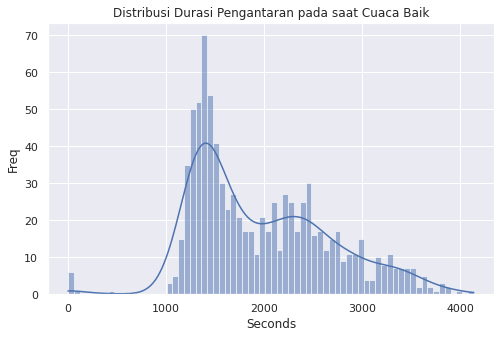

In [26]:
# Menampilkan diagram untuk mengetahui distribusi good weather
sns.set()

plt.figure(figsize=(8,5))
sns.histplot(df_weather_good['duration_seconds'], bins=70, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Freq')
plt.title('Distribusi Durasi Pengantaran pada saat Cuaca Baik')
plt.show()

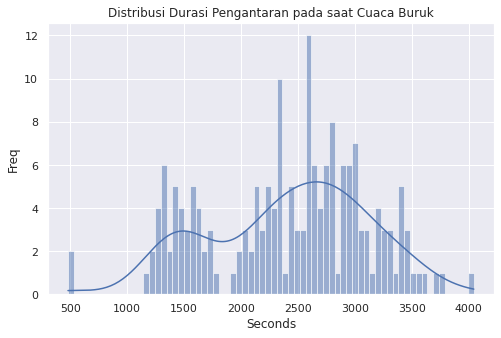

In [27]:
# Menampilkan diagram untuk mengetahui distribusi bad weather
plt.figure(figsize=(8,5))
sns.histplot(df_weather_bad['duration_seconds'], bins=70, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Freq')
plt.title('Distribusi Durasi Pengantaran pada saat Cuaca Buruk')
plt.show()

Untuk menentukan `equal_var` True atau False kita akan menggunakan **Levene Test** karena seperti yang kita lihat salah satu diagram menunjukan distribusi yang miring ke kanan atau **Non-normal Distribution**, kita menetapkan jika nilai `p-value` lebih dari **0.05** maka bisa kita asumsikan bahwa kedua sampel memiliki `equal variance`.

In [28]:
# Determine if the two samples have equal or unequal variance
st.levene(df_weather_good['duration_seconds'], df_weather_bad['duration_seconds'])

LeveneResult(statistic=0.24647542861629418, pvalue=0.6196707782686355)

Nilai `pvalue` menunjukkan angka **0.61**, maka kita bisa tetapkan kedua populasi memiliki varians yang sama, karena lebih tinggi dari nilai **Alpha** yang ditentukan.

In [29]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_weather_good['duration_seconds'], df_weather_bad['duration_seconds'], equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.2430038032744411e-13
We reject the null hypothesis


Dari pengujian diatas kita mendapatkan hasil bahwa `Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan` maka kita dapat meyimpulkan bahwa kondisi cuaca memengaruhi durasi perjalanan, yang mana pada kondisi cuaca sedang hujan akan membutuhkan waktu rata-rata 7-8 menit lebih lama.

# Consclusion

**1. Pengumpulan Data dan Tahap Preprocessing**
- Project ini dimulai dengan pengambilan data eksternal melalui situs web, mempelajari basis data, dan menganalisa data dari kompetitor.
- Kita memiliki **3** dataset untuk dianalisis, dataset pertama mamuat tentang informasi perusahaan taxi, data kedua memuat tentang informasi lokasi pengantaran, dan data ketiga memuat informasi tentang waktu yang dibutuhkan untuk pengantaran pada saat cuaca sedang hujan dan tidak hujan.
- Pertama-tama kita memuat **2** dataset *company* dan *dropoff location*, kita mempelajari isi data, memastikan bahwa type data sesuai.

**2. Explanatory Data Analysis dan Uji Hipotesis**
- Selajutnya kita menganalisis mengenai perusahaan yang memiliki perjalanan terbanyak, dan tujuan terpopuler kemudian kita menampilkan grafiknya.
- Tahap selanjutnya kita memuat data mengenai cuaca dan menganalisa apakah cuaca memengaruhi durasi pengantaran dengan metode **t-test**.

**3. Result and Rocommendation**
- Perusahaan **Flash Cab** secara signifikan memiliki jumlah pengantaran lebih banyak dibandingkan para kompetitor memiliki selisih diatas **40%** dibandingkan peringkat dua, data lainnya juga menunjukkan bahwa **Loop** dan **River North** menjadi tujuan terpopuler dari lokasi lainnya.
- Hasil uji hipotesis menunjukan bahwa `Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan` maka kita dapat meyimpulkan bahwa kondisi cuaca dapat memengaruhi waktu penumpang tiba di lokasi tujuan dangan selisih waktu tempuh rata-rata 7 menit lebih lama jika cuaca hujan.
- Kita perlu memepelajari lebih lanjut mengapa perusahaan **Flash Cab** memiliki jumlah perjalanan tertinggi, kita juga mengetahui bahwa **Loop** dan **River North** menjadi tujuan tepopuler jadi para *driver* dapat memilih untuk menunggu penumpang di area tersebut, pada saat cuaca hujan kita dapat memberitahukan *customer* bahwa mungkin akan terjadi keterlambatan waktu penjemputan dan pengantaran sehingga para penumpang dapat memesan taxi lebih awal.